In [ ]:
import pandas as pd
from pathlib import Path

# Define file paths (adjust paths as needed)
files = ["Exp1.csv", "Exp2.csv"]

# Step 1: Load all CSV files while ensuring consistent columns
dfs = []
common_columns = None

for file in files:
    df = pd.read_csv(file)

    # Track common columns across files
    if common_columns is None:
        common_columns = set(df.columns)
    else:
        common_columns = common_columns.intersection(set(df.columns))

    dfs.append(df)

# Step 2: Standardize columns (keep only common columns)
dfs_standardized = [df[list(common_columns)] for df in dfs]

# Step 3: Concatenate vertically
combined_df = pd.concat(dfs_standardized, axis=0, ignore_index=True)

# Step 4: Save the combined file
combined_df.to_csv("Cutting_Forces.csv", index=False)

print(f"Successfully combined {len(files)} files. Final shape: {combined_df.shape}")
print(f"Saved to: combined_data.csv")

Successfully combined 2 files. Final shape: (612, 27)
Saved to: combined_data.csv


In [ ]:
combined_df

,Subgroup,Fy,f,Tool_ID,Experiment,TCond,Init_diameter,Rku,Final_diameter,F,...,Replica,Position,CTime,Rt,Fx,ap,vc,Rsk,Group,Ra
0,2,44.46,0.07,21,1,0.0,94.0,2.423,93.5,69.600499,...,1,a,na,2.082,49.23,0.25,350,0.560,1,0.391
1,2,44.46,0.07,21,1,0.0,94.0,2.229,93.5,69.600499,...,1,a,na,1.918,49.23,0.25,350,0.530,1,0.359
2,2,44.46,0.07,21,1,0.0,94.0,2.332,93.5,69.600499,...,1,a,na,2.062,49.23,0.25,350,0.634,1,0.421
3,2,44.46,0.07,21,1,0.0,94.0,2.325,93.5,69.600499,...,1,a,na,2.063,49.23,0.25,350,0.676,1,0.450
4,2,44.46,0.07,21,1,0.0,94.0,2.636,93.5,69.600499,...,1,a,na,1.957,49.23,0.25,350,0.714,1,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,na,221.20,0.09,81,2,0.3,76.6,3.603,75.6,342.904447,...,2,h,na,3.168,195.10,0.50,350,0.925,6,0.488
608,na,221.20,0.09,81,2,0.3,76.6,3.741,75.6,342.904447,...,2,h,na,2.993,195.10,0.50,350,1.013,6,0.481
609,na,221.20,0.09,81,2,0.3,76.6,3.951,75.6,342.904447,...,2,h,na,3.156,195.10,0.50,350,1.060,6,0.467
610,na,221.20,0.09,81,2,0.3,76.6,3.386,75.6,342.904447,...,2,h,na,3.037,195.10,0.50,350,0.870,6,0.481


In [ ]:
combined_df.columns

Index(['Subgroup', 'Fy', 'f', 'Tool_ID', 'Experiment', 'TCond',
       'Init_diameter', 'Rku', 'Final_diameter', 'F', 'Fz', 'Condition', 'RSm',
       'Run_ID', 'Rz', 'Machined_length', 'R_measurement', 'Replica',
       'Position', 'CTime', 'Rt', 'Fx', 'ap', 'vc', 'Rsk', 'Group', 'Ra'],
      dtype='object')

In [ ]:
combined_df.drop(columns = ['Run_ID', 'Experiment', 'Replica'], inplace=True)

In [ ]:
combined_df

,Subgroup,Fy,f,Tool_ID,TCond,Init_diameter,Rku,Final_diameter,F,Fz,...,R_measurement,Position,CTime,Rt,Fx,ap,vc,Rsk,Group,Ra
0,2,44.46,0.07,21,0.0,94.0,2.423,93.5,69.600499,21.07,...,1,a,na,2.082,49.23,0.25,350,0.560,1,0.391
1,2,44.46,0.07,21,0.0,94.0,2.229,93.5,69.600499,21.07,...,2,a,na,1.918,49.23,0.25,350,0.530,1,0.359
2,2,44.46,0.07,21,0.0,94.0,2.332,93.5,69.600499,21.07,...,3,a,na,2.062,49.23,0.25,350,0.634,1,0.421
3,2,44.46,0.07,21,0.0,94.0,2.325,93.5,69.600499,21.07,...,4,a,na,2.063,49.23,0.25,350,0.676,1,0.450
4,2,44.46,0.07,21,0.0,94.0,2.636,93.5,69.600499,21.07,...,5,a,na,1.957,49.23,0.25,350,0.714,1,0.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,na,221.20,0.09,81,0.3,76.6,3.603,75.6,342.904447,174.90,...,2,h,na,3.168,195.10,0.50,350,0.925,6,0.488
608,na,221.20,0.09,81,0.3,76.6,3.741,75.6,342.904447,174.90,...,3,h,na,2.993,195.10,0.50,350,1.013,6,0.481
609,na,221.20,0.09,81,0.3,76.6,3.951,75.6,342.904447,174.90,...,4,h,na,3.156,195.10,0.50,350,1.060,6,0.467
610,na,221.20,0.09,81,0.3,76.6,3.386,75.6,342.904447,174.90,...,5,h,na,3.037,195.10,0.50,350,0.870,6,0.481


In [ ]:
combined_df.shape

(612, 24)

In [ ]:
(combined_df=='na').sum()

,0
Subgroup,288
Fy,0
f,0
Tool_ID,0
TCond,0
Init_diameter,0
Rku,0
Final_diameter,0
F,0
Fz,0


In [ ]:
(combined_df=='na').sum()

,0
Subgroup,288
Fy,0
f,0
Tool_ID,0
TCond,0
Init_diameter,0
Rku,0
Final_diameter,0
F,0
Fz,0


In [ ]:
combined_df=combined_df.drop(columns=['Subgroup'])

In [ ]:
(combined_df=='na').sum()

,0
Fy,0
f,0
Tool_ID,0
TCond,0
Init_diameter,0
Rku,0
Final_diameter,0
F,0
Fz,0
Condition,0


In [ ]:
combined_df=combined_df.drop(columns=['Machined_length','CTime'])

Non-numeric features:
['Position']


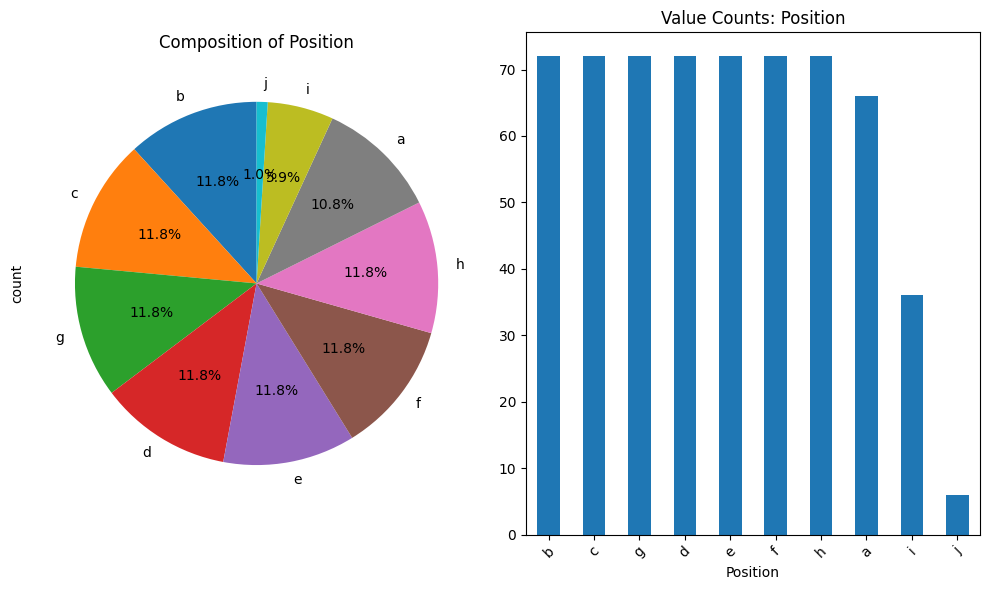


Composition of 'Position':
          Count  Percentage (%)
Position                       
b            72           11.76
c            72           11.76
g            72           11.76
d            72           11.76
e            72           11.76
f            72           11.76
h            72           11.76
a            66           10.78
i            36            5.88
j             6            0.98


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Identify non-numeric columns
non_numeric_cols = combined_df.select_dtypes(exclude=['number']).columns

print("Non-numeric features:")
print(non_numeric_cols.tolist())

# 2. Analyze composition of each non-numeric column
for col in non_numeric_cols:
    # Get value counts and percentages
    value_counts = combined_df[col].value_counts(dropna=False)
    percentages = combined_df[col].value_counts(normalize=True, dropna=False).round(4)*100

    # Create figure
    plt.figure(figsize=(10,6))

    # Pie chart
    plt.subplot(1,2,1)
    value_counts.plot(kind='pie', autopct='%1.1f%%',
                    startangle=90,
                    title=f'Composition of {col}')

    # Bar chart (for better readability if many categories)
    plt.subplot(1,2,2)
    value_counts.plot(kind='bar',
                     title=f'Value Counts: {col}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"\nComposition of '{col}':")
    print(pd.DataFrame({
        'Count': value_counts,
        'Percentage (%)': percentages
    }))

In [ ]:
combined_df.columns

Index(['Fy', 'f', 'Tool_ID', 'TCond', 'Init_diameter', 'Rku', 'Final_diameter',
       'F', 'Fz', 'Condition', 'RSm', 'Rz', 'R_measurement', 'Position', 'Rt',
       'Fx', 'ap', 'vc', 'Rsk', 'Group', 'Ra'],
      dtype='object')

In [ ]:
combined_df.shape

(612, 21)

<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,



TOOL_ID COMPOSITION
Total unique values: 12
Missing values: 0

Top 5 values:
         Count  Percentage (%)
Tool_ID                       
21          54            8.82
31          54            8.82
41          54            8.82
51          54            8.82
61          54            8.82

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []

GROUP COMPOSITION
Total unique values: 6
Missing values: 0

Top 5 values:
       Count  Percentage (%)
Group                       
1        156           25.49
2        156           25.49
3        156           25.49
4         48            7.84
5         48            7.84

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []


<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,
<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,



POSITION COMPOSITION
Total unique values: 10
Missing values: 0

Top 5 values:
          Count  Percentage (%)
Position                       
b            72           11.76
c            72           11.76
g            72           11.76
d            72           11.76
e            72           11.76

Rare values (<1% occurrence):
          Count  Percentage (%)
Position                       
j             6            0.98


<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,



CONDITION COMPOSITION
Total unique values: 27
Missing values: 0

Top 5 values:
           Count  Percentage (%)
Condition                       
4             24            3.92
6             24            3.92
5             24            3.92
8             24            3.92
9             24            3.92

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []

TCOND COMPOSITION
Total unique values: 3
Missing values: 0

Top 5 values:
       Count  Percentage (%)
TCond                       
0.0      420           68.63
0.1       96           15.69
0.3       96           15.69

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []


<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,
<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,



INIT_DIAMETER COMPOSITION
Total unique values: 19
Missing values: 0

Top 5 values:
               Count  Percentage (%)
Init_diameter                       
94.0              54            8.82
93.5              54            8.82
92.5              54            8.82
90.9              54            8.82
90.4              54            8.82

Rare values (<1% occurrence):
               Count  Percentage (%)
Init_diameter                       
83.6               6            0.98
82.6               6            0.98
81.6               6            0.98
80.6               6            0.98
79.6               6            0.98
78.6               6            0.98
77.6               6            0.98
76.6               6            0.98

FINAL_DIAMETER COMPOSITION
Total unique values: 19
Missing values: 0

Top 5 values:
                Count  Percentage (%)
Final_diameter                       
93.5               54            8.82
92.5               54            8.82
90.9               

<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,
<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,
<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,



AP COMPOSITION
Total unique values: 3
Missing values: 0

Top 5 values:
      Count  Percentage (%)
ap                         
0.25    252           41.18
0.50    252           41.18
0.80    108           17.65

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []

VC COMPOSITION
Total unique values: 3
Missing values: 0

Top 5 values:
     Count  Percentage (%)
vc                        
350    396           64.71
390    108           17.65
310    108           17.65

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []

F COMPOSITION
Total unique values: 5
Missing values: 0

Top 5 values:
      Count  Percentage (%)
f                          
0.07    180           29.41
0.13    180           29.41
0.10    108           17.65
0.09     72           11.76
0.11     72           11.76

Rare values (<1% occurrence):
Empty DataFrame
Columns: [Count, Percentage (%)]
Index: []


<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,
<ipython-input-179-d53c08b6202c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.head(top_values).values,


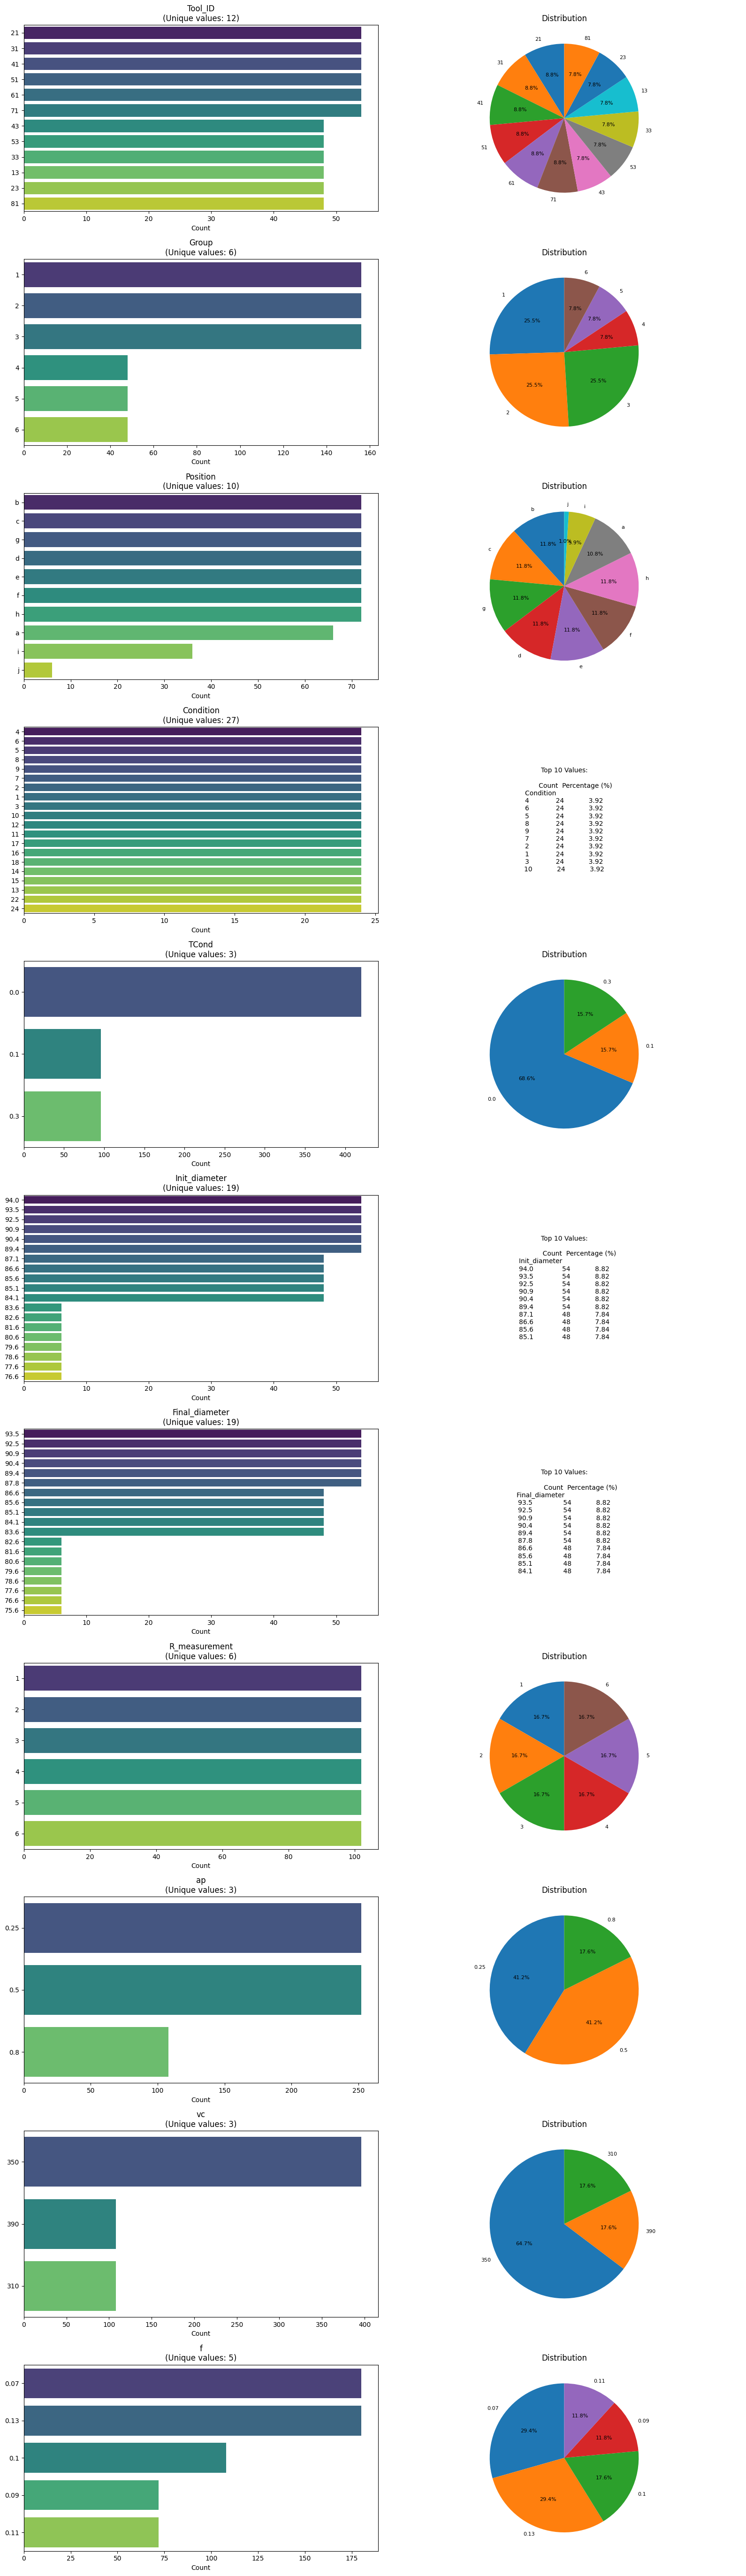

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
cat_features = ['Tool_ID', 'Group', 'Position', 'Condition', 'TCond',
                'Init_diameter', 'Final_diameter', 'R_measurement', 'ap', 'vc', 'f']

# Set up the visualization grid
fig, axes = plt.subplots(nrows=len(cat_features), ncols=2,
                        figsize=(16, 5*len(cat_features)))
plt.subplots_adjust(hspace=0.8)

for idx, feature in enumerate(cat_features):
    # Get value counts
    counts = combined_df[feature].value_counts(dropna=False)
    percentages = combined_df[feature].value_counts(normalize=True, dropna=False).mul(100).round(2)

    # Create summary dataframe
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    }).sort_values('Count', ascending=False)

    # Plot 1: Bar plot (top 20 categories)
    ax1 = axes[idx, 0]
    top_values = min(20, len(counts))
    sns.barplot(x=counts.head(top_values).values,
                y=[str(i) for i in counts.head(top_values).index],
                ax=ax1, palette='viridis')
    ax1.set_title(f'{feature}\n(Unique values: {len(counts)})', fontsize=12)
    ax1.set_xlabel('Count')

    # Plot 2: Composition visualization
    ax2 = axes[idx, 1]
    if len(counts) <= 15:
        # Pie chart for limited categories
        wedges, texts, autotexts = ax2.pie(
            counts,
            labels=[str(i) for i in counts.index],
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 8}
        )
        ax2.set_title('Distribution', fontsize=12)
    else:
        # Show top 10 statistics for high-cardinality features
        ax2.axis('off')
        top_stats = summary.head(10).to_string()
        ax2.text(0.5, 0.5,
                f"Top 10 Values:\n\n{top_stats}",
                ha='center', va='center',
                fontsize=10)

    # Print summary
    print(f"\n{'='*50}")
    print(f"{feature.upper()} COMPOSITION")
    print(f"{'='*50}")
    print(f"Total unique values: {len(counts)}")
    print(f"Missing values: {combined_df[feature].isna().sum()}")
    print(f"\nTop 5 values:")
    print(summary.head(5))
    print(f"\nRare values (<1% occurrence):")
    print(summary[summary['Percentage (%)'] < 1])

plt.tight_layout()
plt.show()

In [ ]:
combined_df=combined_df.drop(columns=['F'])

In [ ]:
combined_df.shape

(612, 20)

In [ ]:
combined_df.columns

Index(['Fy', 'f', 'Tool_ID', 'TCond', 'Init_diameter', 'Rku', 'Final_diameter',
       'Fz', 'Condition', 'RSm', 'Rz', 'R_measurement', 'Position', 'Rt', 'Fx',
       'ap', 'vc', 'Rsk', 'Group', 'Ra'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.preprocessing import TargetEncoder

In [ ]:
categorical_cols=combined_df[['Tool_ID','Position','Group','Condition','TCond','Init_diameter','Final_diameter','R_measurement','ap','vc','f']]
y=combined_df[['Fx','Fy','Fz']]

In [ ]:
import pandas as pd
from category_encoders import TargetEncoder

# Assuming your data is in a DataFrame called 'combined_df'
# and the categorical features are in a list called 'categorical_cols'
# and target variables are in columns 'Fx', 'Fy', 'Fz'

categorical_cols = ['Tool_ID', 'Position', 'Group', 'Condition', 'TCond',
                   'Init_diameter', 'Final_diameter', 'R_measurement', 'ap', 'vc', 'f']
target_cols = ['Fx', 'Fy', 'Fz']

# Create a dictionary to store encoded DataFrames
encoded_dfs = {}

# Loop through each target variable
for target in target_cols:
    # Create a copy of the categorical features
    X = combined_df[categorical_cols].copy()

    # Create a TargetEncoder for the current target variable
    encoder = TargetEncoder(cols=categorical_cols, smoothing=1.0)  # Adjust smoothing if needed

    # Fit and transform the encoder
    encoded_data = encoder.fit_transform(X, combined_df[target])

    # Store the encoded DataFrame in the dictionary
    encoded_dfs[target] = encoded_data

# Now you have three DataFrames (encoded_dfs['Fx'], encoded_dfs['Fy'], encoded_dfs['Fz'])
# with the target encoded categorical features for each target variable separately.

In [ ]:
encoded_dfs['Fx'].shape

(612, 11)

In [ ]:
encoded_dfs['Fy'].shape

(612, 11)

In [ ]:
encoded_dfs['Fz'].shape

(612, 11)

In [ ]:
combined_df.columns

Index(['Fy', 'f', 'Tool_ID', 'TCond', 'Init_diameter', 'Rku', 'Final_diameter',
       'Fz', 'Condition', 'RSm', 'Rz', 'R_measurement', 'Position', 'Rt', 'Fx',
       'ap', 'vc', 'Rsk', 'Group', 'Ra'],
      dtype='object')

In [ ]:
from typing_extensions import final
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have:
# - encoded_dfs: a dictionary containing target-encoded categorical features for each target
# - combined_df: the original DataFrame with continuous features

# 1. Separate continuous features
continuous_features = ['Ra', 'Rz', 'Rsk', 'Rku', 'RSm', 'Rt']  # Replace with your actual feature names
continuous_data = combined_df[continuous_features].copy()

# 2. Apply Standard Scaling
scaler = StandardScaler()
scaled_continuous_data = pd.DataFrame(scaler.fit_transform(continuous_data),
                                     columns=continuous_features,
                                     index=continuous_data.index)

# 3. Combine with target-encoded features (example for 'Fx' target)
final_data_fx = pd.concat([encoded_dfs['Fx'], scaled_continuous_data], axis=1)

final_data_fy = pd.concat([encoded_dfs['Fy'], scaled_continuous_data], axis=1)

final_data_fz = pd.concat([encoded_dfs['Fz'], scaled_continuous_data], axis=1)

# Repeat for other target variables ('Fy', 'Fz')

In [ ]:
final_data_fx

,Tool_ID,Position,Group,Condition,TCond,Init_diameter,Final_diameter,R_measurement,ap,vc,f,Ra,Rz,Rsk,Rku,RSm,Rt
0,67.422222,131.404545,67.296923,66.655623,135.544571,67.422222,67.422222,136.848235,81.057619,132.075,107.204000,-0.959049,-0.953172,0.330673,0.281334,-0.882116,-0.917118
1,67.422222,131.404545,67.296923,66.655623,135.544571,67.422222,67.422222,136.848235,81.057619,132.075,107.204000,-1.064265,-1.110403,0.242553,-0.112635,-0.900870,-1.051771
2,67.422222,131.404545,67.296923,66.655623,135.544571,67.422222,67.422222,136.848235,81.057619,132.075,107.204000,-0.860408,-0.904728,0.548038,0.096535,-0.889617,-0.933539
3,67.422222,131.404545,67.296923,66.655623,135.544571,67.422222,67.422222,136.848235,81.057619,132.075,107.204000,-0.765055,-0.863084,0.671407,0.082319,-0.829603,-0.932718
4,67.422222,131.404545,67.296923,66.655623,135.544571,67.422222,67.422222,136.848235,81.057619,132.075,107.204000,-1.060977,-1.015215,0.783026,0.713888,-0.957134,-1.019749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,201.325000,136.794167,201.325000,179.714870,156.606875,136.848284,136.848284,136.848235,154.923810,132.075,119.643333,-0.640111,-0.036137,1.402808,2.677642,-0.822101,-0.025454
608,201.325000,136.794167,201.325000,179.714870,156.606875,136.848284,136.848284,136.848235,154.923810,132.075,119.643333,-0.663127,-0.088831,1.661296,2.957888,-0.154437,-0.169138
609,201.325000,136.794167,201.325000,179.714870,156.606875,136.848284,136.848284,136.848235,154.923810,132.075,119.643333,-0.709159,-0.105828,1.799351,3.384349,-0.645808,-0.035307
610,201.325000,136.794167,201.325000,179.714870,156.606875,136.848284,136.848284,136.848235,154.923810,132.075,119.643333,-0.663127,-0.161072,1.241254,2.236965,-0.510775,-0.133012


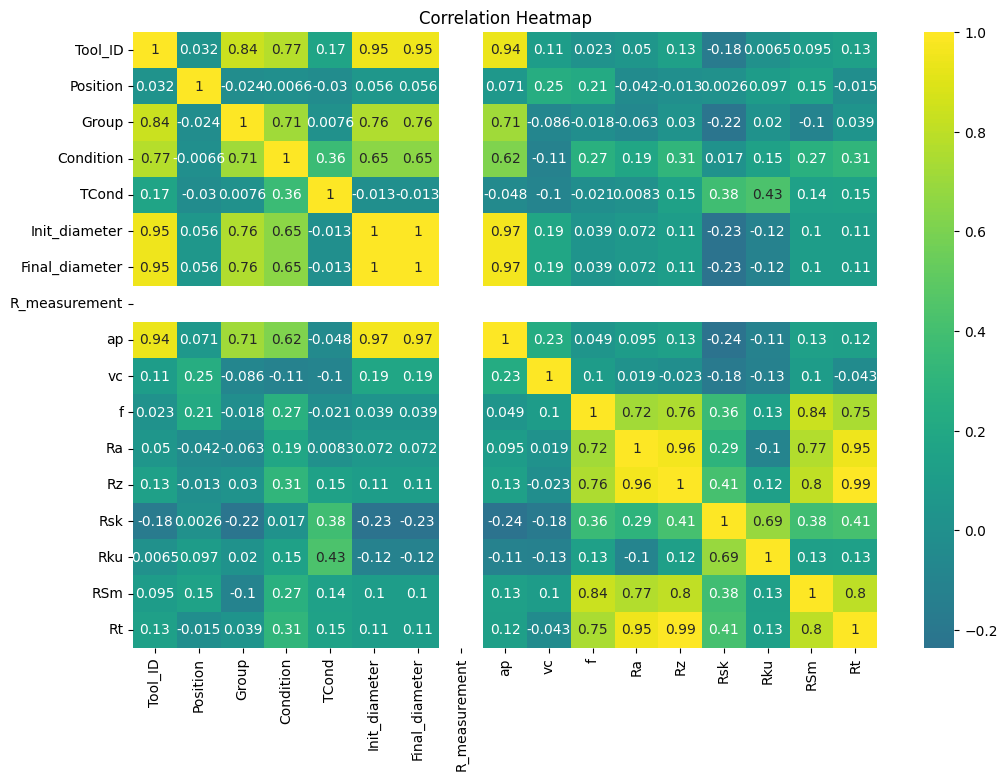

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'final_data_fx'

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(final_data_fx.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the DataFrames: final_data_fx, final_data_fy, final_data_fz

# 1. Create 'diff_dia' and remove 'Init_diameter', 'Final_diameter'
for df in [final_data_fx, final_data_fy, final_data_fz]:
    df['diff_dia'] = df['Init_diameter'] - df['Final_diameter']
    df.drop(columns=['Init_diameter', 'Final_diameter'], inplace=True)

# 2. PCA for categorical features (Tool_ID, Group, diff_dia, Condition)
categorical_features = ['Tool_ID', 'Group', 'diff_dia', 'ap']
for df in [final_data_fx, final_data_fy, final_data_fz]:
    # Standardize categorical features before PCA (if necessary)
    # ... (add standardization code if needed)

    pca_cat = PCA(n_components=1)  # Choose the number of components
    principalComponents_cat = pca_cat.fit_transform(df[categorical_features])
    df[['cat_pc']] = pd.DataFrame(principalComponents_cat)  # Add principal components to DataFrame

# 3. PCA for continuous features
# a. Tool_ID, Group, diff_dia, ap
continuous_features_1 = ['Ra', 'Rz']
for df in [final_data_fx, final_data_fy, final_data_fz]:
    # Standardize features before PCA (if necessary)
    # ... (add standardization code if needed)

    pca_cont1 = PCA(n_components=1)  # Choose the number of components
    principalComponents_cont1 = pca_cont1.fit_transform(df[continuous_features_1])
    df[['cont_pc1']] = pd.DataFrame(principalComponents_cont1)

# b. Ra, Rz
continuous_features_2 = ['f','RSm']
for df in [final_data_fx, final_data_fy, final_data_fz]:
    # Standardize features before PCA (if necessary)
    # ... (add standardization code if needed)

    pca_cont2 = PCA(n_components=1)  # Choose the number of components
    principalComponents_cont2 = pca_cont2.fit_transform(df[continuous_features_2])
    df['cont_pc2'] = principalComponents_cont2  # Add principal component to DataFrame

# c. f, RSm

print("Feature engineering and PCA completed!")

Feature engineering and PCA completed!


In [ ]:
final_data_fx.columns

Index(['Tool_ID', 'Position', 'Group', 'Condition', 'TCond', 'R_measurement',
       'ap', 'vc', 'f', 'Ra', 'Rz', 'Rsk', 'Rku', 'RSm', 'Rt', 'diff_dia',
       'cat_pc', 'cont_pc1', 'cont_pc2'],
      dtype='object')

In [ ]:
final_data_fx.drop(columns=['Tool_ID', 'Group', 'diff_dia', 'Condition','Ra', 'Rz', 'f', 'RSm'], inplace=True)
final_data_fy.drop(columns=['Tool_ID', 'Group', 'diff_dia', 'Condition','Ra', 'Rz', 'f', 'RSm'], inplace=True)
final_data_fz.drop(columns=['Tool_ID', 'Group', 'diff_dia', 'Condition','Ra', 'Rz', 'f', 'RSm'], inplace=True)


In [ ]:
final_data_fx

,Position,TCond,R_measurement,ap,vc,Rsk,Rku,Rt,cat_pc,cont_pc1,cont_pc2
0,131.404545,135.544571,136.848235,81.057619,132.075,0.330673,0.281334,-0.917118,-111.490807,-1.352144,-29.657081
1,131.404545,135.544571,136.848235,81.057619,132.075,0.242553,-0.112635,-1.051771,-111.490807,-1.537722,-29.657719
2,131.404545,135.544571,136.848235,81.057619,132.075,0.548038,0.096535,-0.933539,-111.490807,-1.248140,-29.657336
3,131.404545,135.544571,136.848235,81.057619,132.075,0.671407,0.082319,-0.932718,-111.490807,-1.151268,-29.655292
4,131.404545,135.544571,136.848235,81.057619,132.075,0.783026,0.713888,-1.019749,-111.490807,-1.468089,-29.659636
...,...,...,...,...,...,...,...,...,...,...,...
607,136.794167,156.606875,136.848235,154.923810,132.075,1.402808,2.677642,-0.025454,83.688339,-0.478179,-17.222919
608,136.794167,156.606875,136.848235,154.923810,132.075,1.661296,2.957888,-0.169138,83.688339,-0.531714,-17.200181
609,136.794167,156.606875,136.848235,154.923810,132.075,1.799351,3.384349,-0.035307,83.688339,-0.576283,-17.216915
610,136.794167,156.606875,136.848235,154.923810,132.075,1.241254,2.236965,-0.133012,83.688339,-0.582796,-17.212317


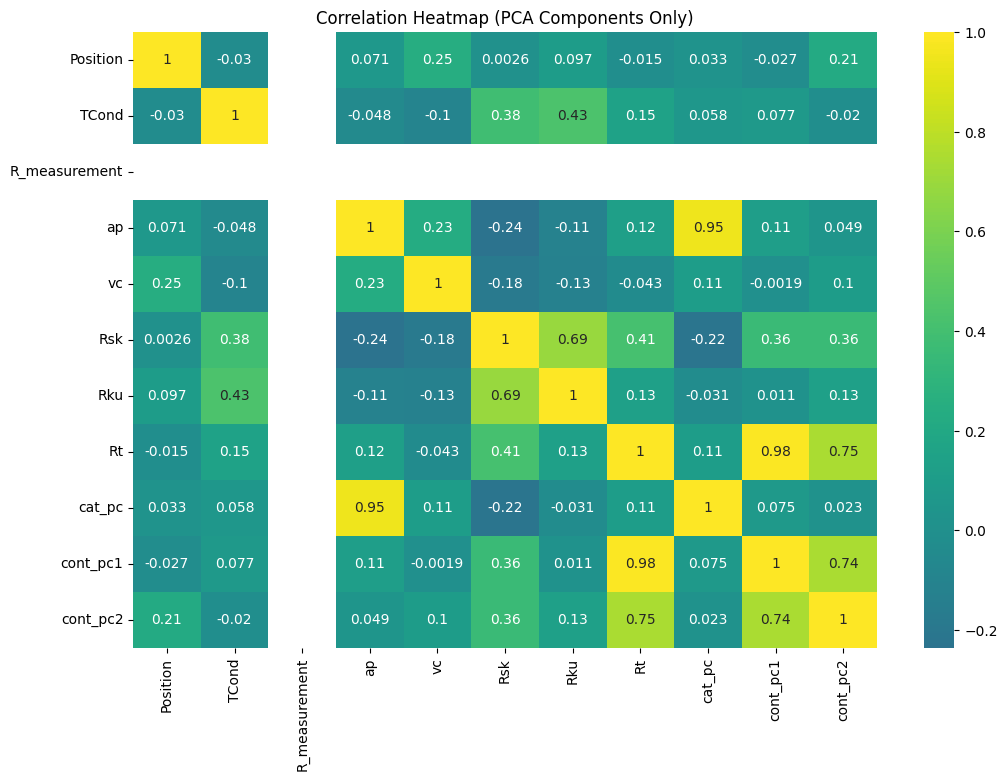

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fx


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



categorical_features = ['cat_pc', 'ap']
for df in [final_data_fx, final_data_fy, final_data_fz]:

    pca_cat = PCA(n_components=1)  # Choose the number of components
    principalComponents_cat = pca_cat.fit_transform(df[categorical_features])
    df[['cat']] = pd.DataFrame(principalComponents_cat)  # Add principal components to DataFrame

continuous_features_1 = ['cont_pc1', 'Rt', 'cont_pc2']
for df in [final_data_fx, final_data_fy, final_data_fz]:

    pca_cont1 = PCA(n_components=1)  # Choose the number of components
    principalComponents_cont1 = pca_cont1.fit_transform(df[continuous_features_1])
    df[['cont_1']] = pd.DataFrame(principalComponents_cont1)


continuous_features_2 = ['Rku','Rsk']
for df in [final_data_fx, final_data_fy, final_data_fz]:

    pca_cont2 = PCA(n_components=1)  # Choose the number of components
    principalComponents_cont2 = pca_cont2.fit_transform(df[continuous_features_2])
    df['cont_2'] = principalComponents_cont2  # Add principal component to DataFrame

# c. f, RSm

print("Feature engineering and PCA completed!")

Feature engineering and PCA completed!


In [ ]:
final_data_fx.drop(columns=['cont_pc1', 'Rt', 'cont_pc2', 'cat_pc', 'Rt', 'ap', 'Rku', 'Rsk'], inplace=True)
final_data_fy.drop(columns=['cont_pc1', 'Rt', 'cont_pc2', 'cat_pc', 'Rt', 'ap', 'Rku', 'Rsk'], inplace=True)
final_data_fz.drop(columns=['cont_pc1', 'Rt', 'cont_pc2', 'cat_pc', 'Rt', 'ap', 'Rku', 'Rsk'], inplace=True)


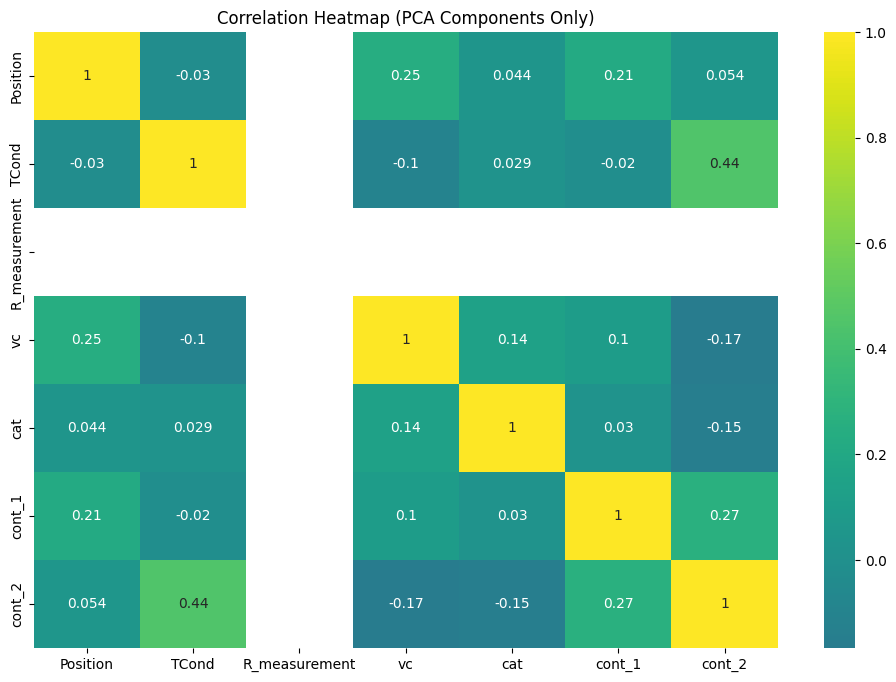

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fx


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

In [ ]:
categorical_features =  ['cat', 'TCond']
pca_cat = PCA(n_components=1)
principalComponents_cat = pca_cat.fit_transform(final_data_fy[categorical_features])
final_data_fy[['cat']] = pd.DataFrame(principalComponents_cat)

In [ ]:
final_data_fy.drop(columns=['TCond'], inplace=True)

In [ ]:
final_data_fy.columns

Index(['Position', 'R_measurement', 'vc', 'cat', 'cont_1', 'cont_2'], dtype='object')

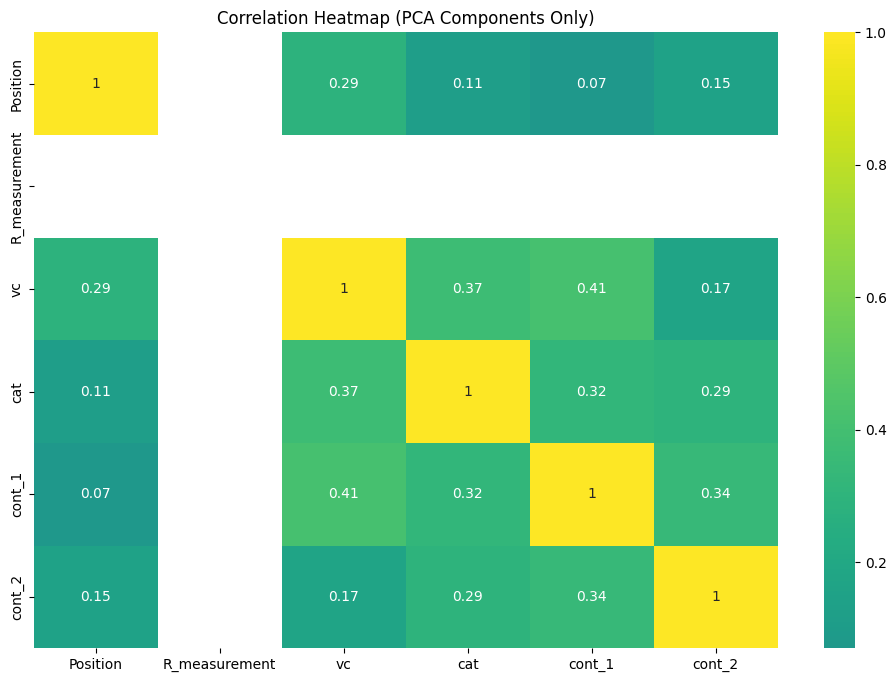

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fy


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

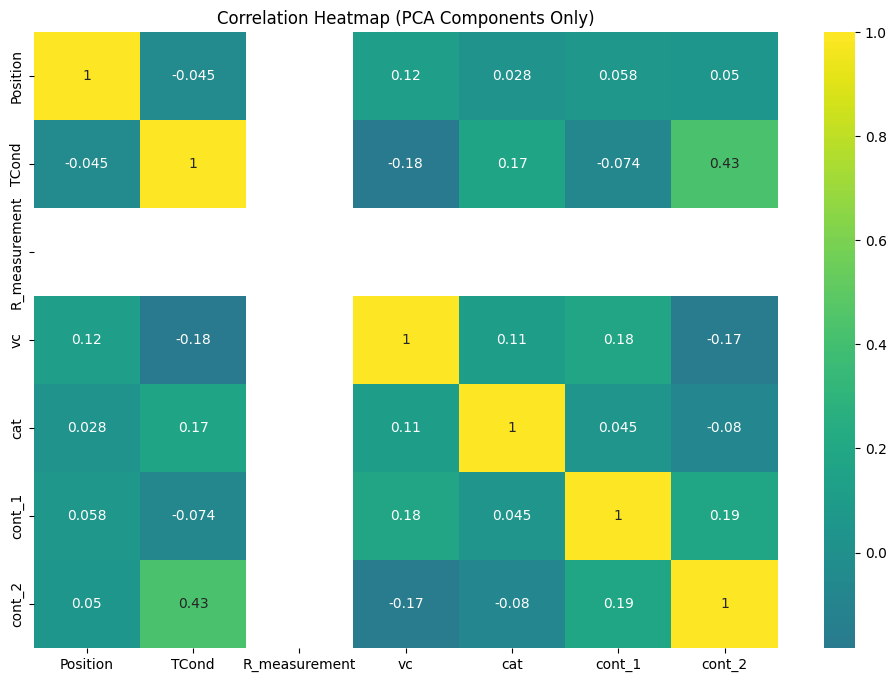

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fz


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

In [ ]:
final_data_fx

,Position,TCond,R_measurement,vc,cat,cont_1,cont_2
0,131.404545,135.544571,136.848235,132.075,-124.286899,-29.701906,0.432755
1,131.404545,135.544571,136.848235,132.075,-124.286899,-29.714511,0.091866
2,131.404545,135.544571,136.848235,132.075,-124.286899,-29.698246,0.455781
3,131.404545,135.544571,136.848235,132.075,-124.286899,-29.692069,0.532965
4,131.404545,135.544571,136.848235,132.075,-124.286899,-29.712496,1.058478
...,...,...,...,...,...,...,...
607,136.794167,156.606875,136.848235,132.075,81.005487,-17.220510,2.885314
608,136.794167,156.606875,136.848235,132.075,81.005487,-17.204441,3.266256
609,136.794167,156.606875,136.848235,132.075,81.005487,-17.218978,3.665430
610,136.794167,156.606875,136.848235,132.075,81.005487,-17.217630,2.459472


In [ ]:
final_data_fy

,Position,TCond,R_measurement,vc,cat,cont_1,cont_2
0,102.856364,65.777857,93.12549,107.474697,-59.856906,-15.439645,0.432755
1,102.856364,65.777857,93.12549,107.474697,-59.856906,-15.444645,0.091866
2,102.856364,65.777857,93.12549,107.474697,-59.856906,-15.438347,0.455781
3,102.856364,65.777857,93.12549,107.474697,-59.856906,-15.436054,0.532965
4,102.856364,65.777857,93.12549,107.474697,-59.856906,-15.443837,1.058478
...,...,...,...,...,...,...,...
607,91.290000,207.268750,93.12549,107.474697,189.891139,24.784547,2.885314
608,91.290000,207.268750,93.12549,107.474697,189.891139,24.790287,3.266256
609,91.290000,207.268750,93.12549,107.474697,189.891139,24.785142,3.665430
610,91.290000,207.268750,93.12549,107.474697,189.891139,24.785419,2.459472


In [ ]:
final_data_fz

,Position,TCond,R_measurement,vc,cat,cont_1,cont_2
0,92.841818,82.268857,88.252647,85.86697,-112.833751,-14.818100,0.432755
1,92.841818,82.268857,88.252647,85.86697,-112.833751,-14.841330,0.091866
2,92.841818,82.268857,88.252647,85.86697,-112.833751,-14.811296,0.455781
3,92.841818,82.268857,88.252647,85.86697,-112.833751,-14.799785,0.532965
4,92.841818,82.268857,88.252647,85.86697,-112.833751,-14.837682,1.058478
...,...,...,...,...,...,...,...
607,82.506667,138.648750,88.252647,85.86697,109.434780,-6.832246,2.885314
608,82.506667,138.648750,88.252647,85.86697,109.434780,-6.801676,3.266256
609,82.506667,138.648750,88.252647,85.86697,109.434780,-6.829237,3.665430
610,82.506667,138.648750,88.252647,85.86697,109.434780,-6.826498,2.459472


In [ ]:
final_data_fx.drop(columns=['R_measurement'], inplace=True)
final_data_fy.drop(columns=['R_measurement'], inplace=True)
final_data_fz.drop(columns=['R_measurement'], inplace=True)

In [ ]:
final_data_fx.columns

Index(['Position', 'TCond', 'vc', 'cat', 'cont_1', 'cont_2'], dtype='object')

In [ ]:
final_data_fy.columns

Index(['Position', 'vc', 'cat', 'cont_1', 'cont_2'], dtype='object')

In [ ]:
final_data_fz.columns

Index(['Position', 'TCond', 'vc', 'cat', 'cont_1', 'cont_2'], dtype='object')

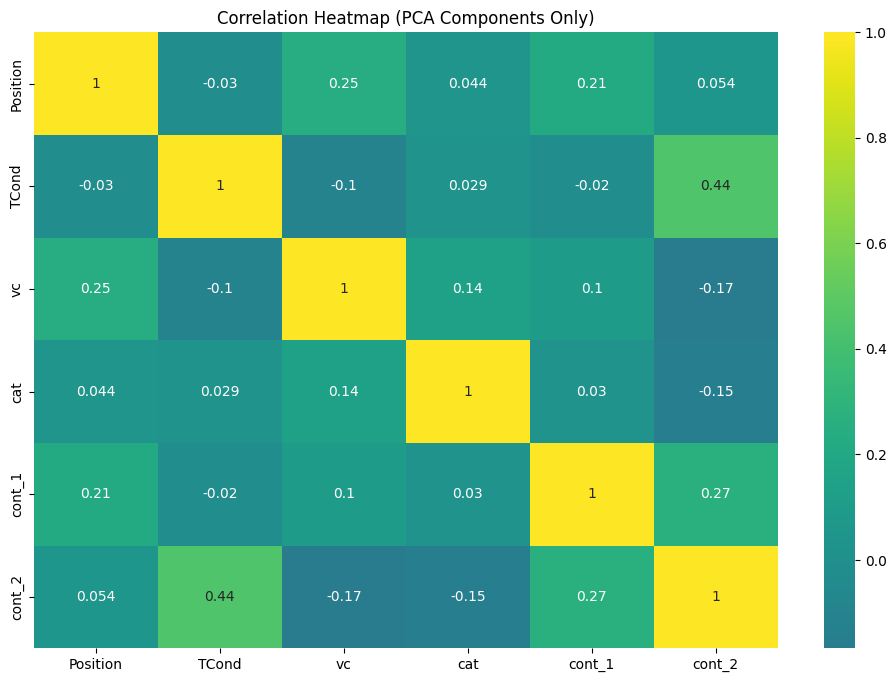

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fx


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

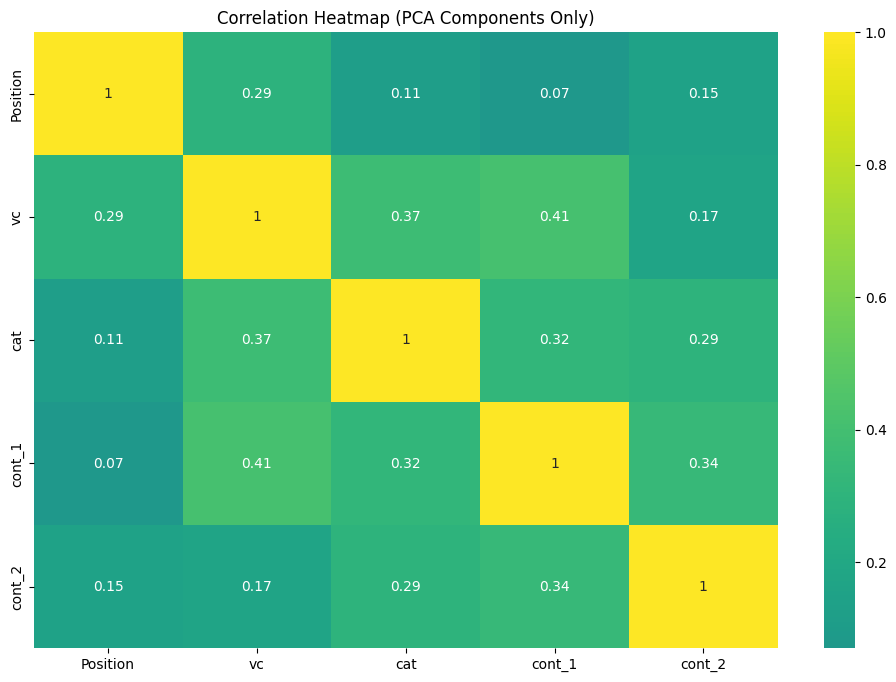

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fy


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

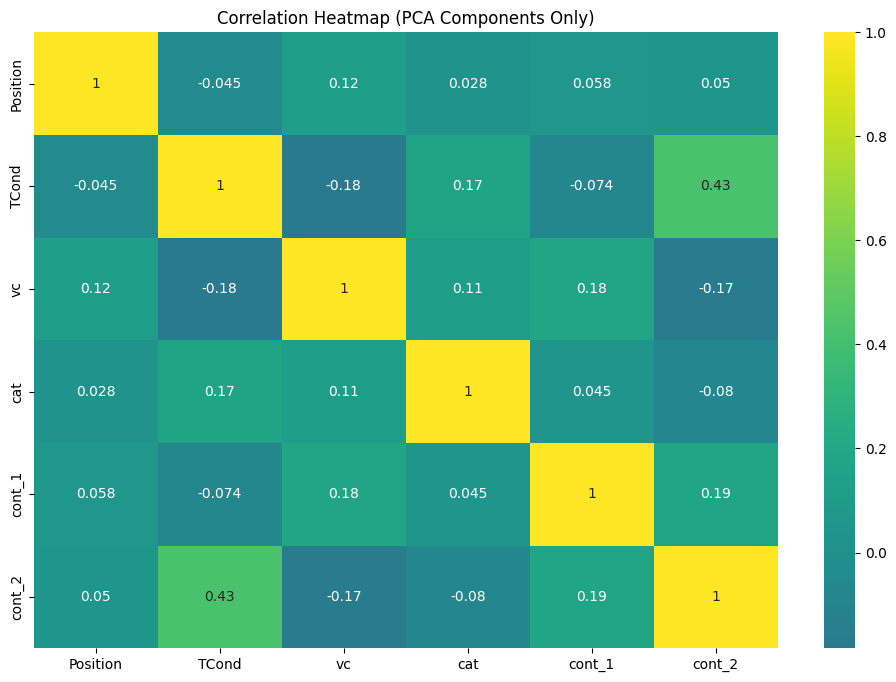

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the updated DataFrames: final_data_fx, final_data_fy, final_data_fz

# Choose the DataFrame you want to plot (e.g., final_data_fx)
df_to_plot = final_data_fz


plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(df_to_plot.corr(), annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap (PCA Components Only)')
plt.show()

In [ ]:
# Assuming you have the DataFrames: final_data_fx, final_data_fy, final_data_fz

final_data_fx.to_csv('final_data_fx.csv', index=False)
final_data_fy.to_csv('final_data_fy.csv', index=False)
final_data_fz.to_csv('final_data_fz.csv', index=False)

print("DataFrames saved as CSV files!")

DataFrames saved as CSV files!
